# SVM (Support Vector Machine)

## 1) Case 1

In [1]:
import numpy as np
from sklearn.svm import SVC
import matplotlib.pyplot as plt

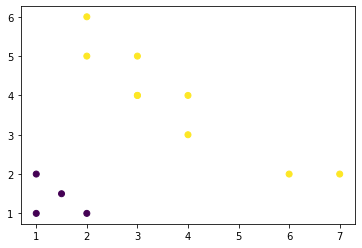

In [2]:
x = np.array([[1,1],[2,1],[1,2],[1.5,1.5],[3,4],[2,5],[4,3],[7,2],[3,5],[2,6],[6,2],[3,4],[4,4]])
y = [0,0,0,0,1,1,1,1,1,1,1,1,1]
x_x1 = x[ : , 0]
x_x2 = x[ : , 1]
plt.scatter(x_x1, x_x2, c = y)
plt.show()

In [3]:
svcLinear = SVC(kernel = 'linear' , C = 1).fit(x , y)
svcLinear.coef_ , svcLinear.intercept_

(array([[0.49989823, 0.49989823]]), array([-2.49953185]))

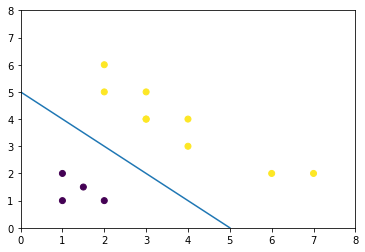

In [4]:
x1 = np.array([0 , 5])
x2 = -1 * (svcLinear.intercept_ + svcLinear.coef_[0][0] * x1) / svcLinear.coef_[0][1]
plt.plot(x1 , x2)
plt.scatter(x_x1 , x_x2 , c = y)
plt.axis([0 , 8 , 0 , 8])
plt.show()

## 2) Case 2

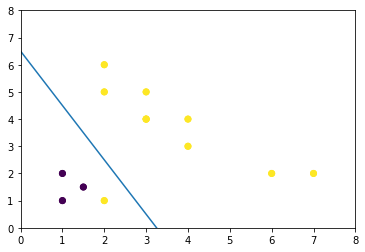

In [5]:
x = np.array([[1,1],[2,1],[1,2],[1.5,1.5],[3,4],[2,5],[4,3],[7,2],[3,5],[2,6],[6,2],[3,4],[4,4]])
y = [0,1,0,0,1,1,1,1,1,1,1,1,1]
x_x1 = x[ : , 0]
x_x2 = x[ : , 1]
plt.scatter(x_x1 , x_x2 , c = y)
# plt.show()
svcLinear = SVC(kernel = 'linear' , C = 1).fit(x , y)
svcLinear.coef_ , svcLinear.intercept_
x1 = np.array([0 , 5])
x2 = -1 * (svcLinear.intercept_ + svcLinear.coef_[0][0] * x1) / svcLinear.coef_[0][1]
plt.plot(x1 , x2)
plt.scatter(x_x1 , x_x2 , c = y)
plt.axis([0 , 8 , 0 , 8])
plt.show()

## 3 ) Case 3 ( cost is much greater than the regularisation part )

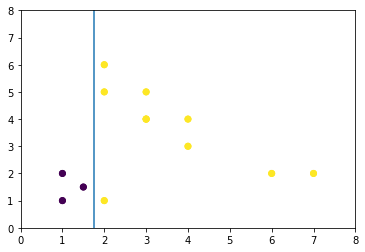

In [6]:
#Increasing the value of C while using the SVC model of Sklearn.svm does :-)
# 1) Decision boundry tries to separate the data points and reduce and reduce wrong classification in training data
# 2) It supports overfitting
x = np.array([[1,1],[2,1],[1,2],[1.5,1.5],[3,4],[2,5],[4,3],[7,2],[3,5],[2,6],[6,2],[3,4],[4,4]])
y = [0,1,0,0,1,1,1,1,1,1,1,1,1]
x_x1 = x[ : , 0]
x_x2 = x[ : , 1]
plt.scatter(x_x1 , x_x2 , c = y)
# plt.show()
svcLinear = SVC(kernel = 'linear' , C = 10000).fit(x , y)
svcLinear.coef_ , svcLinear.intercept_
x1 = np.array([0 , 5])
x2 = -1 * (svcLinear.intercept_ + svcLinear.coef_[0][0] * x1) / svcLinear.coef_[0][1]
plt.plot(x1 , x2)
plt.scatter(x_x1 , x_x2 , c = y)
plt.axis([0 , 8 , 0 , 8])
plt.show()

# 4) SVM on iris datasets

In [7]:
from sklearn import svm , datasets
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [8]:
iris = datasets.load_iris()
## Just to visualize we are taking 2 features
x = iris.data[ : , 0 : 2]
y = iris.target
x_train , x_test , y_train , y_test = train_test_split(x , y)
clf = svm.SVC()
clf.fit(x_train , y_train)
## svc(support vector classifier) implements one vs one
## Linear SVC used One vs Rest
## class weigh = if we want to give some priority to some features
## coef0 = a in Polynomial Kernal ... (xT * li + a) ^ b

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [9]:
clf.score(x_test, y_test)

0.7894736842105263

In [10]:
def makegrid(x1 , x2 , h = 0.002):
    x1_min , x1_max = x1.min() - 1 , x1.max() + 1
    x2_min , x2_max = x2.min() - 1 , x2.max() + 1
    a = np.arange(x1_min , x1_max , h)
    b = np.arange(x2_min , x2_max , h)
    xx , yy = np.meshgrid(a , b)
    return xx , yy
## meshgrid will replicate 2 array's
## arr1 => 1 , 2 , 3
## arr2 => 3 , 4 , 5
## (1 ,3) , (1 , 4) , (1 ,5) , (2 , 3) , .... , (3 , 5)


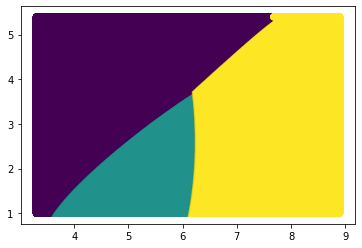

In [11]:
xx , yy = makegrid(x[ : , 0] , x[ : , 1])
predictions = clf.predict(np.c_[xx.ravel() , yy.ravel()])
plt.scatter(xx.ravel(), yy.ravel(), c = predictions)
plt.show()

# 5) Meshgrid

In [12]:
x1 = np.arange(1 , 3 , 0.08)
x1

array([1.  , 1.08, 1.16, 1.24, 1.32, 1.4 , 1.48, 1.56, 1.64, 1.72, 1.8 ,
       1.88, 1.96, 2.04, 2.12, 2.2 , 2.28, 2.36, 2.44, 2.52, 2.6 , 2.68,
       2.76, 2.84, 2.92])

In [13]:
x2 = np.arange(2 , 5 , 0.05)
x2

array([2.  , 2.05, 2.1 , 2.15, 2.2 , 2.25, 2.3 , 2.35, 2.4 , 2.45, 2.5 ,
       2.55, 2.6 , 2.65, 2.7 , 2.75, 2.8 , 2.85, 2.9 , 2.95, 3.  , 3.05,
       3.1 , 3.15, 3.2 , 3.25, 3.3 , 3.35, 3.4 , 3.45, 3.5 , 3.55, 3.6 ,
       3.65, 3.7 , 3.75, 3.8 , 3.85, 3.9 , 3.95, 4.  , 4.05, 4.1 , 4.15,
       4.2 , 4.25, 4.3 , 4.35, 4.4 , 4.45, 4.5 , 4.55, 4.6 , 4.65, 4.7 ,
       4.75, 4.8 , 4.85, 4.9 , 4.95])

In [14]:
xx , yy = np.meshgrid(x1 , x2)
xx

array([[1.  , 1.08, 1.16, ..., 2.76, 2.84, 2.92],
       [1.  , 1.08, 1.16, ..., 2.76, 2.84, 2.92],
       [1.  , 1.08, 1.16, ..., 2.76, 2.84, 2.92],
       ...,
       [1.  , 1.08, 1.16, ..., 2.76, 2.84, 2.92],
       [1.  , 1.08, 1.16, ..., 2.76, 2.84, 2.92],
       [1.  , 1.08, 1.16, ..., 2.76, 2.84, 2.92]])

In [15]:
yy

array([[2.  , 2.  , 2.  , ..., 2.  , 2.  , 2.  ],
       [2.05, 2.05, 2.05, ..., 2.05, 2.05, 2.05],
       [2.1 , 2.1 , 2.1 , ..., 2.1 , 2.1 , 2.1 ],
       ...,
       [4.85, 4.85, 4.85, ..., 4.85, 4.85, 4.85],
       [4.9 , 4.9 , 4.9 , ..., 4.9 , 4.9 , 4.9 ],
       [4.95, 4.95, 4.95, ..., 4.95, 4.95, 4.95]])

# 6) Optimal Value of C and gamma

In [16]:
from sklearn import svm , datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [17]:
iris = datasets.load_iris()
x = iris.data
y = iris.target
x_train , x_test , y_train , y_test = train_test_split(x , y)

### 6a ) On KNeighbors

In [18]:
## on KNeighbors
clf = KNeighborsClassifier()
grid = {"n_neighbors" : [3 , 5 , 7 , 9 , 11]}
abc = GridSearchCV(clf , grid)
abc.fit(x_train , y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [3, 5, 7, 9, 11]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [19]:
abc.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [20]:
abc.cv_results_

{'mean_fit_time': array([0.00183825, 0.00019941, 0.00022044, 0.00119886, 0.00052061]),
 'std_fit_time': array([0.00185923, 0.00039883, 0.00044088, 0.00193806, 0.00104122]),
 'mean_score_time': array([0.01228175, 0.00379114, 0.00120974, 0.00309644, 0.00306778]),
 'std_score_time': array([0.00984098, 0.00194939, 0.00195966, 0.00253255, 0.00249785]),
 'param_n_neighbors': masked_array(data=[3, 5, 7, 9, 11],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 3},
  {'n_neighbors': 5},
  {'n_neighbors': 7},
  {'n_neighbors': 9},
  {'n_neighbors': 11}],
 'split0_test_score': array([0.95652174, 1.        , 1.        , 1.        , 1.        ]),
 'split1_test_score': array([1.        , 1.        , 0.95652174, 0.95652174, 0.95652174]),
 'split2_test_score': array([0.95454545, 0.95454545, 1.        , 0.95454545, 0.95454545]),
 'split3_test_score': array([1.        , 0.95454545, 0.95454545, 0.95454545, 0.90909091])

### 6b ) On SVM

In [21]:
clf = svm.SVC()
grid = {"C" : [1e2 , 1e3 , 5e3 , 1e4  ,5e4 , 1e5] ,
       "gamma" : [1e-3 , 5e-4 , 1e-4 , 5e-3]}
abc = GridSearchCV(clf , grid)
abc.fit(x_train , y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [100.0, 1000.0, 5000.0, 10000.0, 50000.0,
                               100000.0],
                         'gamma': [0.001, 0.0005, 0.0001, 0.005]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [22]:
abc.best_estimator_

SVC(C=1000.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

# 7) Regression using SVM

In [23]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [24]:
boston = datasets.load_boston()
x = boston.data
y = boston.target
x_train,x_test, y_train, y_test = train_test_split(x, y, random_state = 0)

In [25]:
clf = svm.SVR(kernel = "rbf")
clf.fit(x_train, y_train)
clf.score(x_test, y_test)

0.08369460247143334

In [26]:
clf = svm.SVR(kernel = "linear")
clf.fit(x_train, y_train)
clf.score(x_test, y_test)

0.5635479105806482

In [27]:
clf = svm.SVR()
grid = {'C': [1e2,1e3, 5e3, 1e4, 5e4, 1e5],
       'gamma': [1e-3, 5e-4, 1e-4, 5e-3]}
abc = GridSearchCV(clf, grid)
abc.fit(x_train, y_train)
abc.best_estimator_


SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.0001,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [28]:
abc.score(x_test, y_test)

0.6022138976857524